## Introduction to Scikit Learn (Machine Learning Library)

This notebook demonstrate some most useful functions of machine learning of the sklearn library

topics to cover:

1. end-to-end sklearn workflow
2. Getting the data ready
3. Choose the right estimator/algorithem for our problems
4. fit he model/algorithem and use it to make predictions
5. Evaluating the model
6. Improve the model
7. save and load a train model
8. putting it all together

In [1]:
what_were_covered = [ 
    '1. end-to-end sklearn workflow',
    '2. Getting the data ready',
    '3. Choose the right estimator/algorithem for our problems',
    '4. fit he model/algorithem and use it to make predictions',
    '5. Evaluating the model',
    '6. Improve the model',
    '7. save and load a train model',
    '8. putting it all together']

In [2]:
what_were_covered


['1. end-to-end sklearn workflow',
 '2. Getting the data ready',
 '3. Choose the right estimator/algorithem for our problems',
 '4. fit he model/algorithem and use it to make predictions',
 '5. Evaluating the model',
 '6. Improve the model',
 '7. save and load a train model',
 '8. putting it all together']

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 0. End-to-End sklearn Workflow

In [4]:
#  1 Get the data ready
import pandas as pd
heart_disease = pd.read_csv('heart-disease.csv')

In [5]:
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

In [6]:
# 2 Choose the right estimator/algorithem for our problems

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()


In [7]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
clf.fit(x_train, y_train);

In [10]:
# make a prediction
import numpy as np
y_preds = clf.predict(x_test)
y_preds

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [11]:
y_test

260    0
66     1
202    0
275    0
228    0
      ..
186    0
88     1
286    0
9      1
252    0
Name: target, Length: 61, dtype: int64

In [12]:
# evaluate the model on train data and test data

clf.score(x_train, y_train)

1.0

In [13]:
clf.score(x_test, y_test)

0.8360655737704918

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.88      0.82      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



In [15]:
confusion_matrix(y_test, y_preds)

array([[23,  4],
       [ 6, 28]], dtype=int64)

In [16]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [17]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 83.61%

Trying model with 20 estimators...
Model accuracy on test set: 80.33%

Trying model with 30 estimators...
Model accuracy on test set: 83.61%

Trying model with 40 estimators...
Model accuracy on test set: 85.25%

Trying model with 50 estimators...
Model accuracy on test set: 81.97%

Trying model with 60 estimators...
Model accuracy on test set: 80.33%

Trying model with 70 estimators...
Model accuracy on test set: 80.33%

Trying model with 80 estimators...
Model accuracy on test set: 85.25%

Trying model with 90 estimators...
Model accuracy on test set: 85.25%



In [18]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forst_model_1.pkl", "wb"))

In [19]:
loaded_model = pickle.load(open("random_forst_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.8524590163934426

## 1 Getting Data Ready

Three main things we have to do:
* split the data into features and labels (usually 'X' and 'Y')
* Filling Missing values
* converting non-numerical data into numirecal data

In [20]:
# Getting data ready

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Split data into features and labels

In [23]:
## Split the data into features and labels (Training and test sets)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [24]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [25]:
y_train.shape, y_test.shape

((242,), (61,))

In [26]:
heart_disease.shape

(303, 14)

In [27]:
242+61

303

### 1.1 make Sure its all numeric

In [28]:
car_sales = pd.read_csv('car-sales-extended.csv')

In [29]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [30]:
len(car_sales)

1000

In [31]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [32]:
## split into X/y, feature and label

X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

In [33]:
X. head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [34]:
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [35]:
## Split into Training and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
## Build machine learning model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, X_test)

ValueError: could not convert string to float: 'Toyota'

now you can see string value cannot be train 

In [37]:
## converting string values to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

object_feature = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, object_feature)], remainder='passthrough')

transformer_X = transformer.fit_transform(X)
transformer_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [38]:
## lets put it into dataframe

pd.DataFrame(transformer_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [39]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [40]:
car_sales['Make'].value_counts()

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

In [41]:
car_sales.Colour.value_counts()

White    407
Blue     321
Black     99
Red       94
Green     79
Name: Colour, dtype: int64

In [42]:
car_sales['Make'].unique()

array(['Honda', 'BMW', 'Toyota', 'Nissan'], dtype=object)

In [43]:
car_sales.Colour.unique()

array(['White', 'Blue', 'Red', 'Green', 'Black'], dtype=object)

In [44]:
car_sales.Doors.value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

to combine these Series or columns (Make, Colour, Doors) and count the values of these columns we get 12 columns of combined values. and once we convert these string or categorical data into numbers with the help of sklearn OneHotEncoder we get 12 columns. we it means sklearn just converted every columns cetegory into unique or one column

In [45]:
len(transformer_X)

1000

In [46]:
## 1.1 converting object data into numbers with the help of pandas

dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [47]:
## let's refit the machine learning model

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformer_X, y, test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
model.score(X_test, y_test)

0.3235867221569877

## 1.2 what if there is Missing values?

1. Fill them with some values (also known as imputation)
2. remove the samples with missing data altogether

In [49]:
# import missing dataset

car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')

In [50]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [51]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [52]:
car_sales_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [53]:
car_sales_missing.shape

(1000, 5)

In [54]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [55]:
X = car_sales_missing.drop('Price', axis=1)
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [56]:
y = car_sales_missing['Price']
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [57]:
# let's convert our data into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

object_feature = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, object_feature)], remainder='passthrough')

transformer_X = transformer.fit_transform(X)
transformer_X

ValueError: Input contains NaN

In [ ]:
car_sales_missing.head()

## Option 1. Fill Missing values with Pandas

In [ ]:
car_sales_missing['Make'].fillna('missing', inplace=True)

car_sales_missing['Colour'].fillna('missing', inplace=True)

car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

car_sales_missing['Doors'].fillna(4, inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
## remove missing values of Price coloum

car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [ ]:
# let's convert our data into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

object_feature = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, object_feature)], remainder='passthrough')

transformer_X = transformer.fit_transform(car_sales_missing)
transformer_X

In [ ]:
pd.DataFrame(transformer_X).head()

## Option 2. Fill Missing values with scikit-learn (sklearn)

In [ ]:
## Filling missing values with sklearn

car_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_missing.head()

In [ ]:
car_missing.isna().sum()

In [ ]:
car_missing.dropna(subset=['Price'], inplace=True)
car_missing.isna().sum()

In [ ]:
X = car_missing.drop('Price', axis=1)
y = car_missing['Price']

In [ ]:
# fill missing values with sklearn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
cat_impute = SimpleImputer(strategy='constant', fill_value='missing')
door_impute = SimpleImputer(strategy='constant', fill_value=4)
num_impute = SimpleImputer(strategy='mean')

cat_column = ['Make', 'Colour']
door_column = ['Doors']
num_column = ['Odometer (KM)']

In [ ]:
# creating imputer 

imputer = ColumnTransformer([
    ('cat_impute', cat_impute, cat_column),
    ('door_impute', door_impute, door_column),
    ('num_impute', num_impute, num_column)
])

# Transform the data

filled_X = imputer.fit_transform(X)
filled_X

In [ ]:
car_filled = pd.DataFrame(filled_X, 
                         columns = ['Make', 'Colour', 'Doors', 'Odometer (KM)'])

car_filled.head()

In [ ]:
# Converting into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

object_feature = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, object_feature)], remainder='passthrough')

transformer_X = transformer.fit_transform(car_filled)
transformer_X

In [ ]:
pd.DataFrame(transformer_X).head()

In [ ]:
# let's fit the model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformer_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
what_were_covered

## 3 Choosing the right algorithem and use it to make predictions

scikit learn uses estimator as another term for machine learning model or algorithem

* Classification = predicting whether the sample is one thing or another
* regression = predicting the numbers

<img src='sklearn-ml-map-cheatsheet-heart-disease-linear-svc.png'>

## 3.1 picking a machine learning model for regression problem

let's check the documentation of the sklearn = https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [94]:
from sklearn.datasets import load_boston

boston = load_boston()

In [95]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [96]:
len(boston_df)

506

In [97]:
# let's try Ridge model

from sklearn.linear_model import Ridge

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#instantiate the model

model = Ridge()
model.fit(X_train, y_train)

# let's check the score of the ridge model on boston dataset

model.score(X_test, y_test)

0.6662221670168522

How do we improve this score?

what if Ridge model wasn't the right model for our dataset?

In [98]:
# let's try Random Forest Regressor Model

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

# split the data
XX_train, XX_test, yy_train, yy_test = train_test_split(X, y, test_size=0.2)


#let's fit the model
#instantiate the RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(XX_train, yy_train)

# evaluate the model
clf.score(XX_test, yy_test)

# len(y_train), len(X_train)

0.8654448653350507

In [99]:
# let's check the Ridge model

model.score(X_test, y_test)

0.6662221670168522

### 3.2 Choosing right ML model for the classification model

let's check the documentation of sklean = https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [100]:
heart_disease_ML = pd.read_csv('heart-disease.csv')
heart_disease_ML.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<img src='sklearn-ml-map-cheatsheet-heart-disease-linear-svc.png'>

In [101]:
# let's check the length of the dataframe. 
# samples should be greate than 50 samples. so let's check the length of the dataframe or samples

len(heart_disease_ML)

303

On the basis of sklearn map it says try linearSVC

In [102]:
## import the linearSCV Model

from sklearn.svm import LinearSVC

# setup random.seed()
np.random.seed(42)

# create feature and labels
XXX = heart_disease_ML.drop('target', axis=1)
yyy = heart_disease_ML['target']

# split the data
XXX_train, XXX_test, yyy_train, yyy_test = train_test_split(X, y, test_size=0.2)

# instantiate the model
linear_model = LinearSVC(max_iter=10000)
linear_model.fit(XXX_train, yyy_train)

# evaluate the model
linear_model.score(XXX_test, yyy_test)

ValueError: Unknown label type: 'continuous'

In [103]:
heart_disease_ML['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [104]:
## Let's import RandomForestClassifier Model
from sklearn.ensemble import RandomForestClassifier

# setup random.seed()
np.random.seed(42)

# create feature and labels
XXX = heart_disease_ML.drop('target', axis=1)
yyy = heart_disease_ML['target']

# split the data
XXX_train, XXX_test, yyy_train, yyy_test = train_test_split(X, y, test_size=0.2)

# instantiate the model
linear_model = RandomForestClassifier()
linear_model.fit(XXX_train, yyy_train)

# evaluate the model
linear_model.score(XXX_test, yyy_test)

ValueError: Unknown label type: 'continuous'

Note :
 1. if you have structure data use ensemble methods
 2. if you have unstructure data use deep learning and transfer learning

In [105]:
what_were_covered

['1. end-to-end sklearn workflow',
 '2. Getting the data ready',
 '3. Choose the right estimator/algorithem for our problems',
 '4. fit he model/algorithem and use it to make predictions',
 '5. Evaluating the model',
 '6. Improve the model',
 '7. save and load a train model',
 '8. putting it all together']

## 4. fit he model/algorithem and use it to make predictions

#### 4.1 Fitting the model to the data

In [106]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8524590163934426

#### 4.2 make predictions using machine learning model
two ways to make predictions:
1. use `predict()`
2. use `predict_proba()`

##### `Predict()`

In [107]:
## Use a Trainned model to make predictions.
model.predict(np.array([1,2,4,5,6]))

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 4. 5. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [108]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [109]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [110]:
## Compare the predictions to truth table to evaluate the model


In [111]:
y_predic = model.predict(X_test)
np.mean(y_predic == y_test)

0.8524590163934426

In [112]:
## comparing np.mean() with model.score

model.score(X_test, y_test)

0.8524590163934426

In [113]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predic)

0.8524590163934426

###### `Predict_proba()`

In [114]:
# Make predictions with predict_proba()
# predict_proba() returns probabilities of a classification label

##### `Predict()` can be used for regression models

In [115]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

model = RandomForestRegressor().fit(X_train, y_train)

y_preds = model.predict(X_test)

In [116]:
y_preds[:5]

array([23.081, 30.574, 16.759, 23.46 , 16.893])

In [117]:
np.array(y_test[:5])

array([23.6, 32.4, 13.6, 22.8, 16.1])

In [118]:
## Compare the prediction to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

2.136382352941176

In [119]:
what_were_covered

['1. end-to-end sklearn workflow',
 '2. Getting the data ready',
 '3. Choose the right estimator/algorithem for our problems',
 '4. fit he model/algorithem and use it to make predictions',
 '5. Evaluating the model',
 '6. Improve the model',
 '7. save and load a train model',
 '8. putting it all together']

## 5 Evaluating the Model

Three ways to evaluate Machine Learning Model
1. Estimate `score` Method.
2. The `Scoring` Parameter.
3. Problem-Specific metric function.

#### 5.1 Evaluating a Model with `score` Method

In [120]:
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [121]:
clf.score(X_train, y_train)

1.0

In [122]:
## Remember 
## score function of classfication model return the score on the basis of mean. actually they return the mean of the test data 
## which we want to score
clf.score(X_test, y_test)


0.7704918032786885

In [123]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

model = RandomForestRegressor().fit(X_train, y_train)

In [124]:
model.score(X_train, y_train)

0.9763520974033731

In [125]:
model.score(X_test, y_test)
## score function of the regression model return the coeffecient of the test data

0.8654448653350507

#### 5.2 Evaluating a Model using `Scoring Parameter`

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [127]:
clf.score(X_test, y_test)

0.7704918032786885

In [128]:
cross_val_score(clf, X, y)

array([0.80327869, 0.90163934, 0.81967213, 0.85      , 0.8       ])

<img scr='Cross-validation.png'>

<img src='Cross-validation.png' width="800" height="600">

In [129]:
cross_val_score(clf, X, y, cv=4)

array([0.81578947, 0.88157895, 0.77631579, 0.77333333])

In [130]:
np.random.seed(42)

# Single training and split score
clf_single_score = clf.score(X_test, y_test)

# take the mean of the 5-fold cross_validation score
clf_cross_val_mean = np.mean(cross_val_score(clf, X, y, cv=5))

# compare both scores
clf_single_score, clf_cross_val_mean

(0.7704918032786885, 0.8248087431693989)

`Default scoring parameter of classifier = mean accuracy`

In [131]:
clf.score(X_test, y_test)

0.7704918032786885

In [132]:
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [133]:
clf_cros_val_mean = np.mean(cross_val_score(clf, X, y, cv=4, scoring = None))

In [134]:
clf_cros_val_mean

0.8348684210526316

### 5.2.1 Classification Model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification Report

1. **`Accuracy`**

In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

cross_val_score_mean = cross_val_score(clf, X, y, cv=5)

In [136]:
clf_cros_val_mean = np.mean(cross_val_score_mean)
clf_cros_val_mean

0.8248087431693989

In [137]:
print(f'Heart Disease Classifier Cross-validated Accuracy: {clf_cros_val_mean * 100:.2f}%')

Heart Disease Classifier Cross-validated Accuracy: 82.48%


2. **`Area Under ROC (receiver operating charesteristic) curve`
 * AUC = Area Under Curve
 * ROC Curve = reveiver operating charesteristic Curve
 
ROC curve are a comparison of a model's true positive rate (tpr) versus false positive rate(fpr)
 * True Positive = A Model predict 1 when truth is 1
 * False Positive = A Model predict 1 when truth is 0
 * True Negative = A Model predict 0 when truth is 0
 * False Negative = A Model predict 0 when truth is 1

In [138]:
# creating X_train... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [139]:
from sklearn.metrics import roc_curve

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)

y_probs[:5], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57]]),
 61)

In [140]:
y_probs_prositive = y_probs[:, 1]
y_probs_prositive[:5]

array([0.49, 0.83, 0.49, 0.28, 0.57])

In [141]:
len(y_probs_prositive)

61

In [142]:
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_prositive)

In [143]:
# check the false positive rate
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

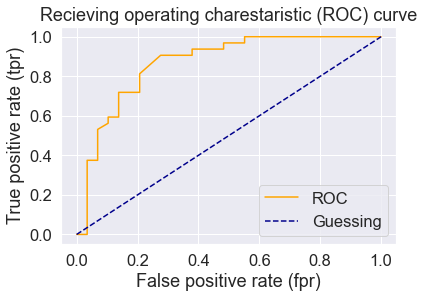

In [144]:
# let's plot the roc
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    plotting a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr)
    '''
    # plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # plot baseline (normal no prdiction line)
    plt.plot([0,1],[0,1], color='darkblue', label='Guessing', linestyle='--')
    
    #customise the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Recieving operating charestaristic (ROC) curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [145]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_prositive)

0.8669181034482759

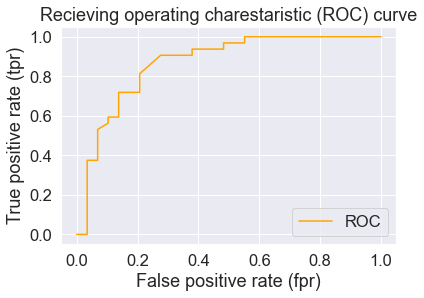

In [146]:
# let's plot the roc
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    plotting a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr)
    '''
    # plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # plot baseline (normal no prdiction line)
#     plt.plot([0,1],[0,1], color='darkblue', label='Guessing', linestyle='--')
    
    #customise the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Recieving operating charestaristic (ROC) curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

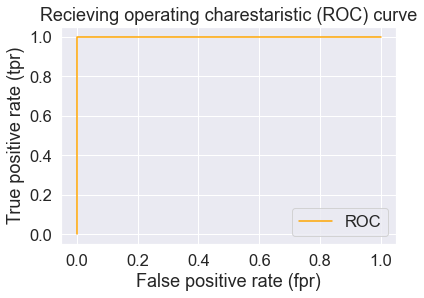

In [147]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)

In [148]:
roc_auc_score(y_test, y_test)

1.0

**Confusion Metrics**

A Confusion metrics is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

in essence, giving you an ideas of where the model is getting confused.

In [149]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [150]:
# visualise confusion matric with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=['actual labels'], colnames=['predictive labels'])

predictive labels,0,1
actual labels,,
0,23,6
1,6,26


In [151]:
23+6+6+26

61

In [152]:
len(y_preds), len(y_test)

(61, 61)

<img src='confusion_matrix.png' width='800' height='500'>

In [153]:
# How to install conda package inside current enviroment in jupyter notebook
import sys
# !conda install --yes --prefix {sys.prefix} seaborn

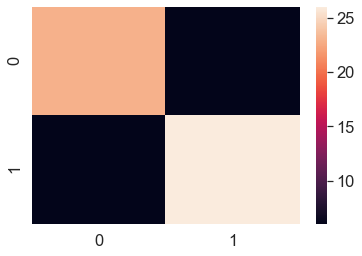

In [154]:
# Make our confusion matrics more visual with the help of seaborn heatmap's
import seaborn as sns

# set the font scale
sns.set(font_scale = 1.5)

# create a confusion matrics
con_mat = confusion_matrix(y_test, y_preds)

# plotting con_mat using seaborn
sns.heatmap(con_mat);

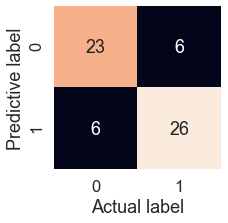

In [155]:
def plot_conf_mat(con_mat):
    '''
    plotting a confusion matrix using seaborn's heatmap
    '''
    fig, ax = plt.subplots(figsize= (3,3))
    ax = sns.heatmap(con_mat,
                    annot=True, # Annotate the boxes with con_mat info
                    cbar = False)
    plt.xlabel('Actual label')
    plt.ylabel('Predictive label')
    
    # fix the broken annotation (this happen in matplotlib 3.1.1)
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5);
    
plot_conf_mat(con_mat);

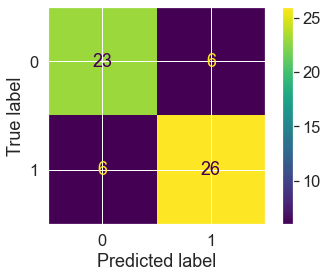

In [156]:
# visualizing confusion matrix with the help of scikit learn


from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

**Classification Report**

In [157]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



<img src='classification_report.png' >

In [158]:
# where precision and recall became valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

C:\Users\hp\Desktop\Data_Science_Project\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
* **Accuracy** A good measure to start with if all classes are balanced (e.g same amount of samples which are labelled with 0 and 1).
* **Precesion** and **Recall** become more important when classes are imbalanaced.
* if false positive predictions are worse than false negatives, aim for higher precision.
* if false negative predictions are worse thatn false postive, aim for higher recall.
* **F1-Score** is the combination of precision and recall.

### 5.2.2 Regression Model Evaluation Metrics
Model eveluation metrics documentation : https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced = R-squard) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squard error (MSE)

**R^2**

what r-squard does: compares your model predictions to the mean of the targets. values ca range from negative infinity (a very poor model) to 1. For example: if all your model does is predict the mean of the targets, it's r-squard value would be 0. and if your model perfectly predicts a range of the numbers it's R^2 value would be 1.

In [166]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

In [167]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [168]:
model.score(X_test, y_test)

0.8654448653350507

In [170]:
from sklearn.metrics import r2_score

# fill in array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [173]:
y_test.mean()

21.488235294117644

In [174]:
r2_score(y_test, y_test_mean)

0.0

In [175]:
r2_score(y_test, y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute bifferences between predicted and actual values. it gives you an idea of how wrong your models predicted are.

In [177]:
# Mean absolute error.
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [180]:
df = pd.DataFrame(data = {'actual values': y_test,
                      'predicted values': y_preds})
df

,actual values,predicted values
173,23.6,23.081
274,32.4,30.574
491,13.6,16.759
72,22.8,23.460
452,16.1,16.893
...,...,...
412,17.9,13.159
436,9.6,12.476
411,17.2,13.612
86,22.5,20.205


In [183]:
df['differences'] = df['actual values'] - df['predicted values']
df

,actual values,predicted values,differences
173,23.6,23.081,0.519
274,32.4,30.574,1.826
491,13.6,16.759,-3.159
72,22.8,23.460,-0.660
452,16.1,16.893,-0.793
...,...,...,...
412,17.9,13.159,4.741
436,9.6,12.476,-2.876
411,17.2,13.612,3.588
86,22.5,20.205,2.295


**Mean squared error (MSE)**

In [186]:
## Mean squared error
from sklearn.metrics import mean_squared_error 

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [187]:
df.head()

,actual values,predicted values,differences
173,23.6,23.081,0.519
274,32.4,30.574,1.826
491,13.6,16.759,-3.159
72,22.8,23.460,-0.660
452,16.1,16.893,-0.793


In [191]:
## Calculate MSE by hands
squared = np.square(df.differences)
squared.mean()

9.867437068627442

<img src='which_regression_metric_should_use.png' width='800'>